<h1>Image Classification - Covid-19 X-Ray</h1>
<br/>
<h2>Context</h2>
<br/>
The Coronavirus Disease 2019 (COVID-19) has brought a worldwide threat to the living society. The whole world is putting incredible efforts to fight against the spread of this deadly disease. Meanwhile, hundreds of machine-learning experts volunteer their time and expertise to help medical researchers in this fight. <br/>
<br/>
One of the areas where machine learning can help is detecting the COVID-19 cases from chest X-ray images. The task is a simple classification problem where given an input chest X-ray image, the machine learning-based model must detect whether the subject of study has been infected or not.<br/>
<h2>Content</h2>
<br/>
The data consists of 60 X-ray images, which are split into 30 COVID-19 subjects and 30 Normal subjects.<br/>
<h2>Acknowledgements</h2>
<br/>
The University of Montreal for releasing the images. <br/>
<br/>
<h2>Notes</h2>
<i>*Purpose of this project is for my learning only, dataset from:*</i>
<a href="https://www.kaggle.com/thomasnibb/image-classification-covid19-xray">Kaggle</a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir ='..\\image_classification_covid_19_x-ray\\photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('../image_classification_covid_19_x-ray/photos')

In [4]:
img_c = len(list(data_dir.glob('*/*.jpg')))
img_c

60

In [5]:
normal = list(data_dir.glob('normal/*'))
normal[:5]

[WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N1.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N10.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N11.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N12.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N13.jpg')]

In [6]:
images_dict = {
    'normal': list(data_dir.glob('normal/*')),
    'covid19': list(data_dir.glob('covid19/*'))
}

In [7]:
images_lab = {
    'normal': 1,
    'covid19': 0
}

In [8]:
img = cv2.imread(str(images_dict['normal'][0]))
img.shape

(1708, 1944, 3)

In [9]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [10]:
X, y = [], []

for photos_name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(images_lab[photos_name])

In [11]:
X[0]

array([[[ 20,  20,  20],
        [ 23,  23,  23],
        [ 25,  25,  25],
        ...,
        [122, 122, 122],
        [ 96,  96,  96],
        [ 88,  88,  88]],

       [[ 19,  19,  19],
        [ 26,  26,  26],
        [ 24,  24,  24],
        ...,
        [116, 116, 116],
        [ 95,  95,  95],
        [ 82,  82,  82]],

       [[ 18,  18,  18],
        [ 23,  23,  23],
        [ 26,  26,  26],
        ...,
        [106, 106, 106],
        [ 87,  87,  87],
        [ 94,  94,  94]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5]]

In [12]:
y[0]

1

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
len(X_train)

45

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

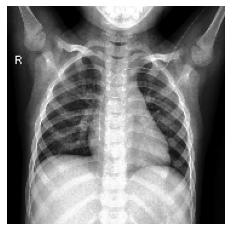

In [17]:
plt.axis('off')
plt.imshow(X[0])

In [18]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.1)
])

In [19]:
n = 2
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n)
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=21)

Epoch 1/21
2/2 [==============================] - 2s 372ms/step - loss: 3.4265 - accuracy: 0.4889
Epoch 2/21
2/2 [==============================] - 1s 369ms/step - loss: 1.3269 - accuracy: 0.6444
Epoch 3/21
2/2 [==============================] - 1s 354ms/step - loss: 1.2918 - accuracy: 0.5111
Epoch 4/21
2/2 [==============================] - 1s 343ms/step - loss: 0.6996 - accuracy: 0.4889
Epoch 5/21
2/2 [==============================] - 1s 344ms/step - loss: 1.0081 - accuracy: 0.4889
Epoch 6/21
2/2 [==============================] - 1s 354ms/step - loss: 0.7893 - accuracy: 0.4889
Epoch 7/21
2/2 [==============================] - 1s 363ms/step - loss: 0.5572 - accuracy: 0.7111
Epoch 8/21
2/2 [==============================] - 1s 354ms/step - loss: 0.5497 - accuracy: 0.7333
Epoch 9/21
2/2 [==============================] - 1s 348ms/step - loss: 0.5199 - accuracy: 0.7556
Epoch 10/21
2/2 [==============================] - 1s 348ms/step - loss: 0.5002 - accuracy: 0.8000
Epoch 11/21
2/2 [==

In [20]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 417ms/step - loss: 0.4818 - accuracy: 0.8000


[0.48180198669433594, 0.800000011920929]

In [21]:
y_test.shape

(15,)

In [22]:
y_predict = model.predict(X_test_scaled)

In [23]:
np.argmax(y_predict[0])

1

In [24]:
y_test[0]

1

In [25]:
y_pred = []

for element in y_predict:
    y_pred.append(np.argmax(element))

In [26]:
y_pred[:5]

[1, 0, 0, 1, 1]

In [27]:
y_test[:5]

array([1, 0, 0, 1, 1])

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.70      1.00      0.82         7

    accuracy                           0.80        15
   macro avg       0.85      0.81      0.80        15
weighted avg       0.86      0.80      0.79        15



Text(60.0, 0.5, 'Truth')

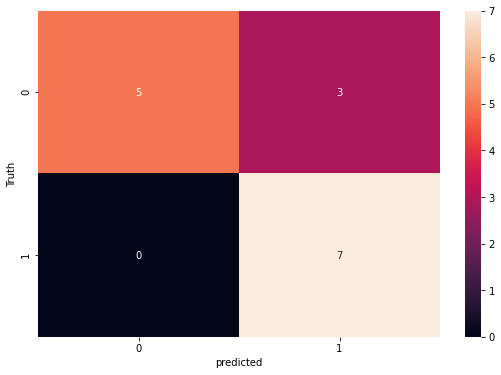

In [29]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')